# S&P500: Winners and loosers of the COVID-19 crisis 


***
We are going to find which companies of the S&P500 soar and fall during the COVID-19 crisis.  
The goal of this study its to find if there are a relation between the variance of the prices and revenues. Trying to observe if the changes in prices are holding by real facts or its just speculation. I will use tools learn from [Data Analysis with Python: Zero to Pandas](zerotopandas.com).
***

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

***
The dataset was got it from Yahoo!Ⓡfinance , using the yfinance library of Ran Aroussi(1).

The idea its to get the prices of all S&P500 companies at 2019-12-31 and compare to 2021-12-08.
The COVID-19 it is an infectious disease caused for the SARS-COV-2 virus(2).
According to the WHO the first case of COVID-19 was discovered the 31 of December of 2019(3).

For that reason we can think to kick off this analysis using that date to compare the variation in the companies of the S&P500.

The S&P500 it is a stock index which lists 500 companies with large capitalization (between other criteria) of United States(4).
***


In [1]:
%pip install yfinance
%pip install XlsxWriter
%pip install pandas-datareader
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import xlsxwriter
import math
from pandas_datareader import data
#import matplotlib.pyplot as plt
#import seaborn as sns
from urllib.request import urlretrieve

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Let's begin by downloading the data, and listing the files within the dataset.

The data set it was uploaded to github 'https://github.com/tango72/SyP19-20/blob/main/SyP500_df2.csv'

In [2]:
SyP500_df = pd.read_csv('SyP500_df2.csv')

The dataset has been downloaded and extracted.

Let us save and upload our work to Jovian before continuing.

In [3]:
project_name = "syp500Wl" 

In [4]:
%pip install jovian --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import jovian

<IPython.core.display.Javascript object>

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Data Preparation and Cleaning

***
In this part we are going to check if the data have some errors and in case of that to fix them.
***

In [7]:
SyP500_df

,Unnamed: 0,Symbol,Close_21,Close_19,Security,GICS Sector,GICS Sub-Industry
0,0,MMM,176.550003,175.830002,3M,Industrials,Industrial Conglomerates
1,1,ABT,132.419998,86.800003,Abbott Laboratories,Health Care,Health Care Equipment
2,2,ABBV,121.510002,88.519997,AbbVie,Health Care,Pharmaceuticals
3,3,ABMD,320.779999,167.289993,Abiomed,Health Care,Health Care Equipment
4,4,ACN,371.339996,210.639999,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...,...,...,...
495,495,YUM,131.300003,100.639999,Yum! Brands,Consumer Discretionary,Restaurants
496,496,ZBRA,605.440002,254.110001,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
497,497,ZBH,128.429993,148.750000,Zimmer Biomet,Health Care,Health Care Equipment
498,498,ZION,64.440002,51.770000,Zions Bancorp,Financials,Regional Banks


In [8]:
del SyP500_df['Unnamed: 0']
SyP500_df

,Symbol,Close_21,Close_19,Security,GICS Sector,GICS Sub-Industry
0,MMM,176.550003,175.830002,3M,Industrials,Industrial Conglomerates
1,ABT,132.419998,86.800003,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,121.510002,88.519997,AbbVie,Health Care,Pharmaceuticals
3,ABMD,320.779999,167.289993,Abiomed,Health Care,Health Care Equipment
4,ACN,371.339996,210.639999,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...,...,...
495,YUM,131.300003,100.639999,Yum! Brands,Consumer Discretionary,Restaurants
496,ZBRA,605.440002,254.110001,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
497,ZBH,128.429993,148.750000,Zimmer Biomet,Health Care,Health Care Equipment
498,ZION,64.440002,51.770000,Zions Bancorp,Financials,Regional Banks


In [9]:
SyP500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             500 non-null    object 
 1   Close_21           500 non-null    float64
 2   Close_19           500 non-null    float64
 3   Security           500 non-null    object 
 4   GICS Sector        500 non-null    object 
 5   GICS Sub-Industry  500 non-null    object 
dtypes: float64(2), object(4)
memory usage: 23.6+ KB


As we can see the data it is Ok. We have a float type in the columns of prices.
Lets get more information.

In [10]:
SyP500_df.describe()

,Close_21,Close_19
count,500.000000,500.000000
mean,211.625640,139.667144
std,401.811005,242.286628
min,11.590000,9.250000
25%,62.577500,53.092500
50%,117.840000,90.564999
75%,225.982498,151.887497
max,5671.379883,3823.000000


Some share has a high value ($5.671). Lets check if its correct finding the shares with a value up to 5000 and looking at Yahoo Finance. 

In [11]:
Max5000=SyP500_df['Close_21']>5000.00
SyP500_df[Max5000]

,Symbol,Close_21,Close_19,Security,GICS Sector,GICS Sub-Industry
347,NVR,5671.379883,3823.0,NVR,Consumer Discretionary,Homebuilding


The data it is correct.

In [12]:
import jovian

In [13]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Exploratory Analysis and Visualization

***
Now we are going to analyze the data finding which were the sectors whose soared their values during this period and select some companies of them to see their Revenue and Net Income.
***


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In the next cell we are going to create 2 columns to compare the price variation:

$Price  Variation$ S $= {Price(21)-Price(19)}$

$Price  Variation$ % $=\frac{Price(21)-Price(19)}{Price(19)}$

In [15]:
SyP500_df["Dif_Price"]=SyP500_df["Close_21"]-SyP500_df["Close_19"]
SyP500_df["Dif_Price_%"]=(SyP500_df["Close_21"]-SyP500_df["Close_19"])/SyP500_df["Close_19"]

QCompanies_Increase = SyP500_df["Dif_Price"]>=0
QCompanies_Decrease = SyP500_df["Dif_Price"]<0

SyP500_df["QCompanies_Increase"] = SyP500_df["Dif_Price"]>=0
SyP500_df["QCompanies_Decrease"] = SyP500_df["Dif_Price"]<0

SyP500_df["QCompanies_Decrease"]=SyP500_df["QCompanies_Decrease"]*1
SyP500_df["QCompanies_Increase"]=SyP500_df["QCompanies_Increase"]*1

In [16]:
SyP500_df

,Symbol,Close_21,Close_19,Security,GICS Sector,GICS Sub-Industry,Dif_Price,Dif_Price_%,QCompanies_Increase,QCompanies_Decrease
0,MMM,176.550003,175.830002,3M,Industrials,Industrial Conglomerates,0.720001,0.004095,1,0
1,ABT,132.419998,86.800003,Abbott Laboratories,Health Care,Health Care Equipment,45.619995,0.525576,1,0
2,ABBV,121.510002,88.519997,AbbVie,Health Care,Pharmaceuticals,32.990005,0.372684,1,0
3,ABMD,320.779999,167.289993,Abiomed,Health Care,Health Care Equipment,153.490005,0.917509,1,0
4,ACN,371.339996,210.639999,Accenture,Information Technology,IT Consulting & Other Services,160.699997,0.762913,1,0
...,...,...,...,...,...,...,...,...,...,...
495,YUM,131.300003,100.639999,Yum! Brands,Consumer Discretionary,Restaurants,30.660004,0.304650,1,0
496,ZBRA,605.440002,254.110001,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,351.330002,1.382590,1,0
497,ZBH,128.429993,148.750000,Zimmer Biomet,Health Care,Health Care Equipment,-20.320007,-0.136605,0,1
498,ZION,64.440002,51.770000,Zions Bancorp,Financials,Regional Banks,12.670002,0.244736,1,0


We are going to group the data by sector

In [17]:
SyP_Q_VarPrice_df = SyP500_df.groupby('GICS Sector')[["GICS Sector","QCompanies_Increase","QCompanies_Decrease",'Dif_Price_%']].sum().reset_index()


In [18]:
SyP_Q_VarPrice_df

,GICS Sector,QCompanies_Increase,QCompanies_Decrease,Dif_Price_%
0,Communication Services,16,11,6.944987
1,Consumer Discretionary,53,10,45.251795
2,Consumer Staples,19,12,3.919211
3,Energy,11,10,0.807700
4,Financials,57,7,21.955118
5,Health Care,47,16,42.033829
6,Industrials,61,11,31.749598
7,Information Technology,62,12,60.168409
8,Materials,27,1,13.836696
9,Real Estate,24,5,7.863273


In [19]:
SyP_Q_VarPrice_df["%Companies_Increase"]=SyP_Q_VarPrice_df["QCompanies_Increase"]/(SyP_Q_VarPrice_df["QCompanies_Increase"]+SyP_Q_VarPrice_df["QCompanies_Decrease"])


In [20]:
SyP_Q_VarPrice_df.sort_values('Dif_Price_%', ascending=False)

,GICS Sector,QCompanies_Increase,QCompanies_Decrease,Dif_Price_%,%Companies_Increase
7,Information Technology,62,12,60.168409,0.837838
1,Consumer Discretionary,53,10,45.251795,0.841270
5,Health Care,47,16,42.033829,0.746032
6,Industrials,61,11,31.749598,0.847222
4,Financials,57,7,21.955118,0.890625
8,Materials,27,1,13.836696,0.964286
9,Real Estate,24,5,7.863273,0.827586
0,Communication Services,16,11,6.944987,0.592593
2,Consumer Staples,19,12,3.919211,0.612903
3,Energy,11,10,0.807700,0.523810


As we can see the sectors which have a greatest variation in price have a great % of Companies which increase their share prices. 
That allow us to get the correct idea that almost all the sector goes up and not just a few companies of them.

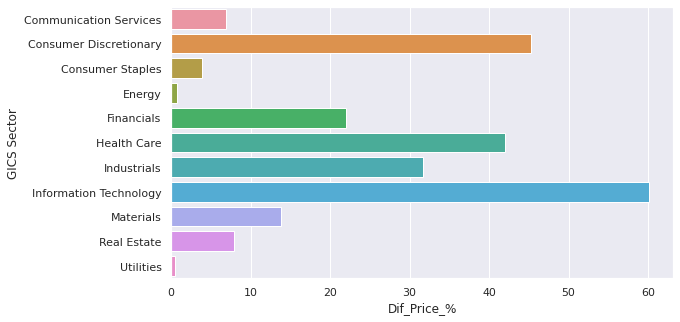

In [21]:
sns.set_theme(style="darkgrid")
info_shares = pd.DataFrame(SyP_Q_VarPrice_df)
ax = sns.barplot(x="Dif_Price_%", y="GICS Sector", data=info_shares)

The Information Technology, Consumer Discretionary and Health Care are the top 3 of the Sectors sort by price variation.

In the next cells we are going to select the top 5 companies of the 3 sectors mentioned before and get the total revenue and net income.

In [22]:
SyP500_df.sort_values('Dif_Price_%', ascending=False)

,Symbol,Close_21,Close_19,Security,GICS Sector,GICS Sub-Industry,Dif_Price,Dif_Price_%,QCompanies_Increase,QCompanies_Decrease
317,MRNA,282.350006,19.049999,Moderna,Health Care,Biotechnology,263.300007,13.821523,1,0
436,TSLA,1051.750000,82.940002,Tesla,Consumer Discretionary,Automobile Manufacturers,968.809998,11.680853,1,0
168,ENPH,222.559998,25.370001,Enphase Energy,Information Technology,Electronic Components,197.189997,7.772566,1,0
346,NVDA,324.269989,58.080002,Nvidia,Information Technology,Semiconductors,266.189987,4.583161,1,0
176,ETSY,237.449997,44.470001,Etsy,Consumer Discretionary,Internet & Direct Marketing Retail,192.979996,4.339555,1,0
...,...,...,...,...,...,...,...,...,...,...
403,RCL,71.639999,133.350006,Royal Caribbean Group,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-61.710007,-0.462767,0,1
280,LVS,37.070000,69.300003,Las Vegas Sands,Consumer Discretionary,Casinos & Gaming,-32.230003,-0.465079,0,1
456,UAL,43.410000,87.959999,United Airlines,Industrials,Airlines,-44.549999,-0.506480,0,1
86,CCL,18.500000,51.020000,Carnival Corporation,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-32.520000,-0.637397,0,1


In [23]:
Top_Tech= SyP500_df [SyP500_df["GICS Sector"] == "Information Technology"].sort_values('Dif_Price_%', ascending=False)
Top_Consumer= SyP500_df [SyP500_df["GICS Sector"] == "Consumer Discretionary"].sort_values('Dif_Price_%', ascending=False)
Top_Health= SyP500_df [SyP500_df["GICS Sector"] == "Health Care"].sort_values('Dif_Price_%', ascending=False)

In [24]:
Health_list=Top_Health.head(5)["Symbol"].tolist()
Consumer_list=Top_Consumer.head(5)["Symbol"].tolist()
Tech_list=Top_Tech.head(5)["Symbol"].tolist()

Top_companies_list=list()
Top_companies_list = Tech_list + Health_list + Consumer_list

In [25]:
import pandas as pd
import numpy as np
#Data to find and fecha between ""
def Finantial_data_year (data_to_find,companies_list,fecha):
    finantial_data= list()
    for ticker in companies_list:
        try:
            share = yf.Ticker(ticker)
            dfincome_statement=share.financials
            data =dfincome_statement.loc[data_to_find,fecha][0]
        except:
             data= 0   
        finantial_data.append(data)
    return finantial_data

In [26]:
#Get data of the cies 19
Revenue_list_19 = Finantial_data_year("Total Revenue",Top_companies_list,"2019")
Net_Income_list_19 = Finantial_data_year("Net Income Applicable To Common Shares",Top_companies_list,"2019")

columns=["Symbol","Revenue_19","Net_Income_19"]
df_Finantial_19=pd.DataFrame()

df_Finantial_19["Symbol"]= Top_companies_list
df_Finantial_19["Revenue_19"]= Revenue_list_19
df_Finantial_19["Net_Income_19"]= Net_Income_list_19

In [27]:
#Get data 20
Revenue_list_20 = Finantial_data_year("Total Revenue",Top_companies_list,"2020")
Net_Income_list_20 = Finantial_data_year("Net Income Applicable To Common Shares",Top_companies_list,"2020")

columns=["Symbol","Revenue_20","Net_Income_20"]
df_Finantial_20=pd.DataFrame()

df_Finantial_20["Symbol"]= Top_companies_list
df_Finantial_20["Revenue_20"]= Revenue_list_20
df_Finantial_20["Net_Income_20"]= Net_Income_list_20

In [28]:
Winners = df_Finantial_19.merge(df_Finantial_20, on="Symbol")

In [29]:
Winners

,Symbol,Revenue_19,Net_Income_19,Revenue_20,Net_Income_20
0,ENPH,0,0,0,0
1,NVDA,0,0,0,0
2,AMD,0,0,0,0
3,MPWR,0,0,0,0
4,FTNT,0,0,0,0
5,MRNA,0,0,0,0
6,WST,0,0,0,0
7,DXCM,0,0,0,0
8,ALGN,0,0,0,0
9,CRL,0,0,0,0


In [30]:
#GET data 21
Revenue_list_21 = [1234169000,24274000000,14852000000,1104337000,3126600000,11831395000,2681000000,2319200000,3756005000,3426100000,46848000000,2229330000,12985000000,5099288000,12290086000]
Net_Income_list_21 = [165849000,8206000000,3969000000,212239000,554500000,7060936000,612500000,529300000,740047000,396595000,3468000000,480488000,1019000000,602188000,911669000]
Winners["Revenue_21"] = Revenue_list_21
Winners["Net_Income_21"] = Net_Income_list_21

In [31]:
Winners["Var_Revenue"] = (Winners["Revenue_21"]/Winners["Revenue_19"])-1
Winners["Var_Net_Income"] = (Winners["Net_Income_21"]/Winners["Net_Income_19"])-1
Winners

,Symbol,Revenue_19,Net_Income_19,Revenue_20,Net_Income_20,Revenue_21,Net_Income_21,Var_Revenue,Var_Net_Income
0,ENPH,0,0,0,0,1234169000,165849000,inf,inf
1,NVDA,0,0,0,0,24274000000,8206000000,inf,inf
2,AMD,0,0,0,0,14852000000,3969000000,inf,inf
3,MPWR,0,0,0,0,1104337000,212239000,inf,inf
4,FTNT,0,0,0,0,3126600000,554500000,inf,inf
5,MRNA,0,0,0,0,11831395000,7060936000,inf,inf
6,WST,0,0,0,0,2681000000,612500000,inf,inf
7,DXCM,0,0,0,0,2319200000,529300000,inf,inf
8,ALGN,0,0,0,0,3756005000,740047000,inf,inf
9,CRL,0,0,0,0,3426100000,396595000,inf,inf


In [32]:
Winners = Winners.merge(SyP500_df, on="Symbol")

In [33]:
Winners=Winners[['Symbol','Security','GICS Sector','GICS Sub-Industry', 'Revenue_19', 'Revenue_20', 'Revenue_21', 'Net_Income_19', 'Net_Income_20', 'Net_Income_21', 'Var_Revenue', 'Var_Net_Income',"Dif_Price_%"]]

In [34]:
Winners

,Symbol,Security,GICS Sector,GICS Sub-Industry,Revenue_19,Revenue_20,Revenue_21,Net_Income_19,Net_Income_20,Net_Income_21,Var_Revenue,Var_Net_Income,Dif_Price_%
0,ENPH,Enphase Energy,Information Technology,Electronic Components,0,0,1234169000,0,0,165849000,inf,inf,7.772566
1,NVDA,Nvidia,Information Technology,Semiconductors,0,0,24274000000,0,0,8206000000,inf,inf,4.583161
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,0,0,14852000000,0,0,3969000000,inf,inf,2.182118
3,MPWR,Monolithic Power Systems,Information Technology,Semiconductors,0,0,1104337000,0,0,212239000,inf,inf,2.020237
4,FTNT,Fortinet,Information Technology,Systems Software,0,0,3126600000,0,0,554500000,inf,inf,1.966246
5,MRNA,Moderna,Health Care,Biotechnology,0,0,11831395000,0,0,7060936000,inf,inf,13.821523
6,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,0,0,2681000000,0,0,612500000,inf,inf,1.851071
7,DXCM,DexCom,Health Care,Health Care Equipment,0,0,2319200000,0,0,529300000,inf,inf,1.582913
8,ALGN,Align Technology,Health Care,Health Care Supplies,0,0,3756005000,0,0,740047000,inf,inf,1.418895
9,CRL,Charles River Laboratories,Health Care,Life Sciences Tools & Services,0,0,3426100000,0,0,396595000,inf,inf,1.415372


The top 5 of the Information and Technology are:

In [35]:
Winners[0:5]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Revenue_19,Revenue_20,Revenue_21,Net_Income_19,Net_Income_20,Net_Income_21,Var_Revenue,Var_Net_Income,Dif_Price_%
0,ENPH,Enphase Energy,Information Technology,Electronic Components,0,0,1234169000,0,0,165849000,inf,inf,7.772566
1,NVDA,Nvidia,Information Technology,Semiconductors,0,0,24274000000,0,0,8206000000,inf,inf,4.583161
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,0,0,14852000000,0,0,3969000000,inf,inf,2.182118
3,MPWR,Monolithic Power Systems,Information Technology,Semiconductors,0,0,1104337000,0,0,212239000,inf,inf,2.020237
4,FTNT,Fortinet,Information Technology,Systems Software,0,0,3126600000,0,0,554500000,inf,inf,1.966246


3 of the 5 produced Semiconductors.
As a consequence of the COVID-19 mobility restrictions in most of the countries some jobs started to do remote increasing the demand of laptops among other technological products (most of them use semiconductors). At the same time a delay in the supply chain were produced by the government measures impacting specially in the maritime transport. This are some of the events which produced the semiconductors shortage.


The top 5 of the Health Care are:

In [36]:
Winners[5:10]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Revenue_19,Revenue_20,Revenue_21,Net_Income_19,Net_Income_20,Net_Income_21,Var_Revenue,Var_Net_Income,Dif_Price_%
5,MRNA,Moderna,Health Care,Biotechnology,0,0,11831395000,0,0,7060936000,inf,inf,13.821523
6,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,0,0,2681000000,0,0,612500000,inf,inf,1.851071
7,DXCM,DexCom,Health Care,Health Care Equipment,0,0,2319200000,0,0,529300000,inf,inf,1.582913
8,ALGN,Align Technology,Health Care,Health Care Supplies,0,0,3756005000,0,0,740047000,inf,inf,1.418895
9,CRL,Charles River Laboratories,Health Care,Life Sciences Tools & Services,0,0,3426100000,0,0,396595000,inf,inf,1.415372


Moderna it is the only COVID-19 vaccine producer in the list. Moderna vaccine works different than the traditional vaccines. It could be a great discover for the Pharma industry.

The top 5 of the Consumer Discretionary are:

In [37]:
Winners[10:15]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Revenue_19,Revenue_20,Revenue_21,Net_Income_19,Net_Income_20,Net_Income_21,Var_Revenue,Var_Net_Income,Dif_Price_%
10,TSLA,Tesla,Consumer Discretionary,Automobile Manufacturers,0,0,46848000000,0,0,3468000000,inf,inf,11.680853
11,ETSY,Etsy,Consumer Discretionary,Internet & Direct Marketing Retail,0,0,2229330000,0,0,480488000,inf,inf,4.339555
12,BBWI,Bath & Body Works,Consumer Discretionary,Specialty Stores,0,0,12985000000,0,0,1019000000,inf,inf,4.199234
13,POOL,Pool Corporation,Consumer Discretionary,Distributors,0,0,5099288000,0,0,602188000,inf,inf,1.620126
14,TSCO,Tractor Supply Company,Consumer Discretionary,Specialty Stores,0,0,12290086000,0,0,911669000,inf,inf,1.511733


TSLA it is a car-maker and the first one in the list. (Most of car-makers companies have a big size or market capitalization).

In the follow graph we are going to see the variation of the revenue for the companies we have selected.

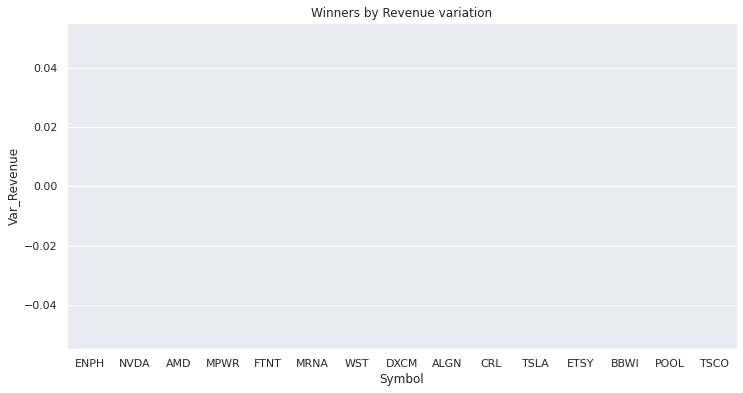

In [38]:
plt.figure(figsize=(12, 6))
plt.title('Winners by Revenue variation')
sns.set_theme(style="whitegrid")
Top_Shares = pd.DataFrame(Winners)
ax = sns.barplot(x="Symbol", y="Var_Revenue", data=Top_Shares)

Next we are going to see the variation of the net income for the companies.

In [39]:
Winners.iat[10,11] = 4.986207 
Winners.iloc[5, 11] = 14.736668

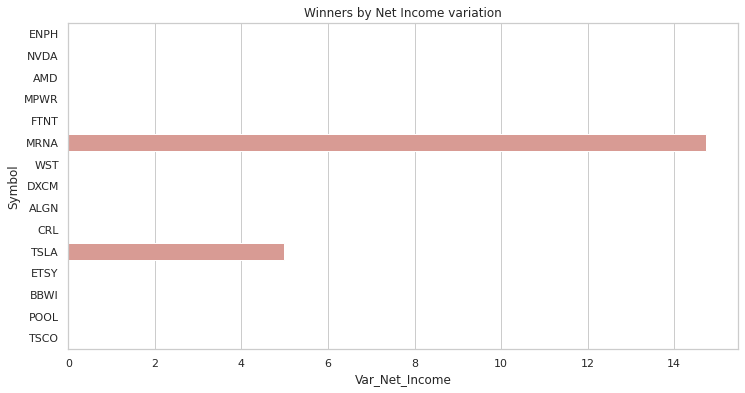

In [40]:
plt.figure(figsize=(12, 6))
plt.title('Winners by Net Income variation')
sns.set_theme(style="darkgrid")
Top_Shares = pd.DataFrame(Winners)
ax = sns.barplot(x="Var_Net_Income", y="Symbol", data=Top_Shares,
                 color="salmon", saturation=.5)

In the graph below we can see the variations of prices:

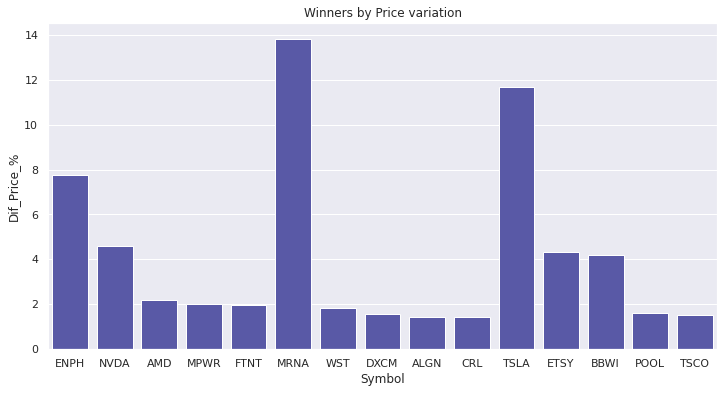

In [41]:
plt.figure(figsize=(12, 6))
plt.title('Winners by Price variation')
sns.set_theme(style="darkgrid")
Top_Shares = pd.DataFrame(Winners)

ax = sns.barplot(x="Symbol", y="Dif_Price_%", data=Top_Shares,
                 color="blue", saturation=.3)

Now we are going to find the 10 companies with the worst performance considering the variation of the price

In [42]:
Loosers = SyP500_df.sort_values('Dif_Price_%', ascending=True)

In [43]:
Top_Loosers=Loosers.head(10)

In [44]:
Top_Loosers

,Symbol,Close_21,Close_19,Security,GICS Sector,GICS Sub-Industry,Dif_Price,Dif_Price_%,QCompanies_Increase,QCompanies_Decrease
343,NCLH,20.120001,58.590000,Norwegian Cruise Line Holdings,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-38.469999,-0.656597,0,1
86,CCL,18.500000,51.020000,Carnival Corporation,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-32.520000,-0.637397,0,1
456,UAL,43.410000,87.959999,United Airlines,Industrials,Airlines,-44.549999,-0.506480,0,1
280,LVS,37.070000,69.300003,Las Vegas Sands,Consumer Discretionary,Casinos & Gaming,-32.230003,-0.465079,0,1
403,RCL,71.639999,133.350006,Royal Caribbean Group,Consumer Discretionary,"Hotels, Resorts & Cruise Lines",-61.710007,-0.462767,0,1
51,T,23.080000,39.040001,AT&T,Communication Services,Integrated Telecommunication Services,-15.960001,-0.408811,0,1
491,WYNN,86.440002,139.380005,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,-52.940002,-0.379825,0,1
27,AAL,17.889999,28.299999,American Airlines Group,Industrials,Airlines,-10.410000,-0.367845,0,1
469,VTRS,12.400000,19.430000,Viatris,Health Care,Pharmaceuticals,-7.030001,-0.361812,0,1
70,BA,208.830002,326.399994,Boeing,Industrials,Aerospace & Defense,-117.569992,-0.360202,0,1


Let us save and upload our work to Jovian before continuing

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Asking and Answering Questions

***
Finally we are going to ask and respond some questions of the data analysis did it in the previous paragraphs.
***

#### Q1: Which were the sectors with most variation?

Mainly Information Technology, Consumer Discretionary and Health Care:

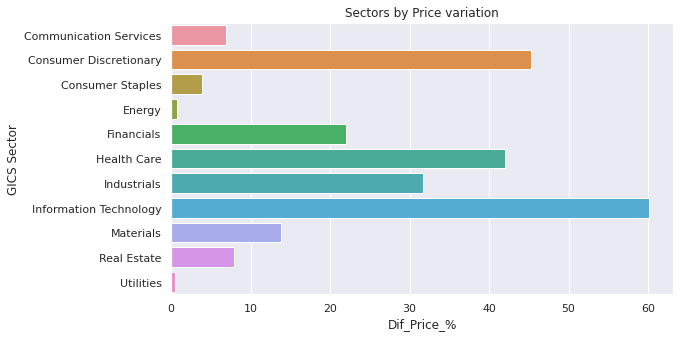

In [47]:
sns.set_theme(style="darkgrid")
plt.title('Sectors by Price variation')
info_shares = pd.DataFrame(SyP_Q_VarPrice_df)
ax = sns.barplot(x="Dif_Price_%", y="GICS Sector", data=info_shares)

#### Q2: Which was the company with the highest % of Revenue variation? (of the group we considered as Winners)

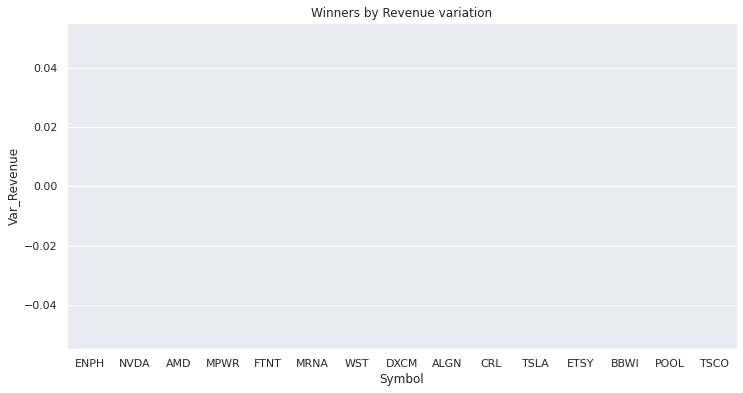

In [48]:
#Top mas subieron % Rev
plt.figure(figsize=(12, 6))
plt.title('Winners by Revenue variation')
sns.set_theme(style="whitegrid")
Top_Shares = pd.DataFrame(Winners)
ax = sns.barplot(x="Symbol", y="Var_Revenue", data=Top_Shares)

Moderna was it.

#### Q3: Which was the company with the highest % of Net Income variation? (of the group we considered as Winners)

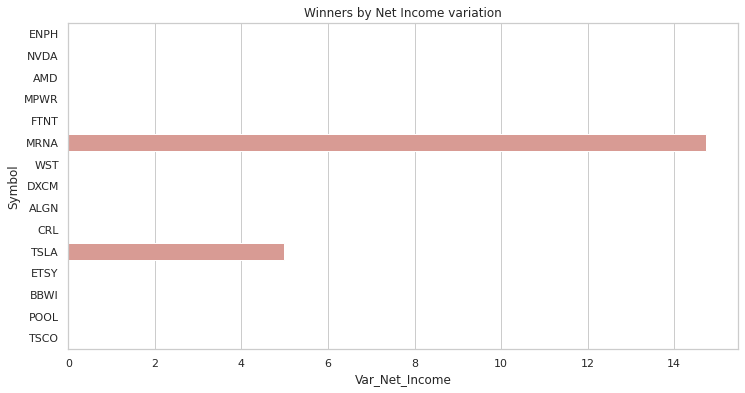

In [49]:
#Top mas subieron % Net Income
plt.figure(figsize=(12, 6))
plt.title('Winners by Net Income variation')
sns.set_theme(style="darkgrid")
Top_Shares = pd.DataFrame(Winners)
ax = sns.barplot(x="Var_Net_Income", y="Symbol", data=Top_Shares,
                 color="salmon", saturation=.5)

Moderna was it.

#### Q4: Which are the 10 stocks with the highest price increases  ? 

In [50]:
wl=SyP500_df.sort_values('Dif_Price_%', ascending=False)
Winners_shares=wl.head(10)["Symbol"].tolist()
Winners_list=list(Winners_shares)
print("The 10 stocks with the highest price increase were:"+ str(Winners_list)[1:-1]+".")

The 10 stocks with the highest price increase were:'MRNA', 'TSLA', 'ENPH', 'NVDA', 'ETSY', 'BBWI', 'ALB', 'GNRC', 'AMD', 'MPWR'.


#### Q5: Which are the 10 stocks with the biggest price drops ? 

In [51]:
Loosers_shares=Top_Loosers.head(10)["Symbol"].tolist()
Loosers_list=list(Loosers_shares)
print("The 10 stocks with the biggest price drops were:"+ str(Loosers_list)[1:-1]+".")

The 10 stocks with the biggest price drops were:'NCLH', 'CCL', 'UAL', 'LVS', 'RCL', 'T', 'WYNN', 'AAL', 'VTRS', 'BA'.


Let us save and upload our work to Jovian before continuing.

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## Inferences and Conclusion

***
The increase in the stocks of the S&P500 looks like motivated in speculation than in real economic facts.

During the period the US GDP increased 7,33%(5) and CPI 8,16%(6) (inflation rate); the global GDP increased 8.63%(7) by the other hand the S&P500 increased 43,54%(8).

The Information Technological and Health Care were 2 of the 3 sectors that grew the most.

Companies that decrease their stock prices more are from the Hotel and Airlines industry.
***

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


## References and Future Work

***
This dataset could be used as a base and add data of the revenue, net income and other ratios when the financial statements at 2021-12-31 will be published. And see how were affected financially the companies which biggest drops.
***

**References:**
* **(1) https://github.com/ranaroussi/yfinance**
* **(2) https://www.who.int/health-topics/coronavirus#tab=tab_1**
* **(3) https://www.who.int/news/item/27-04-2020-who-timeline---covid-19**
* **(4) https://www.investopedia.com/terms/s/sp500.asp**
* **(5) https://www.imf.org/external/datamapper/NGDPD@WEO/USA**
* **(6) https://data.bls.gov/timeseries/CUUR0000SA0?years_option=all_years**
* **(7) https://www.imf.org/external/datamapper/NGDPD@WEO/WEOWORLD**
* **(8) https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC**

In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
